# **AP157 Machine Learning Lab Assignment**
## Module A.2: Classification -- Morphological Classification of Galaxies using Decision Trees

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1, 2, and 3 are worth 20, 40, and 40 points, respectively).

_Credits_: This assignment is based on the Week 6 module of the Coursera course "Data-driven Astronomy", "Exploring machine learning classification" ([link](https://www.coursera.org/learn/data-driven-astronomy/home/welcome))

### Student Information

_Full Name (Last Name, First Name)_: Geraldino, Simon Paul Andrew\
_Student No._: 2020-11068\
_Section_: THY-TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Simon Paul Andrew M. Geraldino**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/40
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For this assignment, you will work with galaxy data from the
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the binary file ```galaxy_catalogue.npy``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```galaxy_catalogue.npy``` from your Google Drive folder.

Mount the Google Drive where you saved the .npy file.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [55]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [56]:
!ls drive/My\ Drive

'00 Introduction.gslides'
'00 Introduction.pptx'
'04 Central Dogma.pdf'
'1 cm long Cu wire redox.drawio'
 202011068-22026904-PaymentSlip.pdf
 202011068.jpg
 20230705_165352.jpg
 88-2020-MERIT-Undergrad-Qualifier-Notification-Letter-GERALDINO.pdf
 Academics.gsheet
'ACCTG 1 QUIZ 1.gsheet'
'ACCTG 1 QUIZ 4.gsheet'
'ACCTG QUIZ 2.gsheet'
'ACCTG QUIZ 3.gsheet'
'acetic acid analysis.drawio'
'Activity 4_Summary Report_Stay At Ohm_Draft.gdoc'
 affiliation_df.csv
 affiliation_df.gsheet
'anion elim test.drawio'
'AP 155'
'AP155 - 20230926 - Module 1 - Integrals and Derivatives.gslides'
'AP155 - 20230926 - Module 1 - Integrals and Derivatives.pptx'
'AP 157'
'AP157 Course Guide AY 2023-2024 2nd Sem.pdf'
'AP157 Course Pack'
 apk
'Applied Physics 171.gsheet'
 Articles
'Assignment 1: Greetings (Script).gdoc'
'Assignments (3rd Quarter)'
'Assignments (4th Quarter)'
'author_df (1).gsheet'
'author_df (2).gsheet'
'author_df (3).gsheet'
 author_df.csv
 author_df.gsheet
'b20.simon.geraldino@pshs.edu.ph 2022-01

Define the directory path to the location of the file, i.e. if it is in a
folder named "AP157" under My Drive, then the file path will be "/content/drive/My Drive/AP157". Change the string variable in the code cell below, as needed:

In [57]:
file_path = "/content/drive/My Drive/AP 157/"

Now, we can load the file using $\tt numpy$'s $\tt load$ function below.





In [58]:
import numpy as np

data = np.load(file_path + 'galaxy_catalogue.npy')

Print out the first couple of rows. Note that the columns are: $u-g$, $g-r$, $r-i$, $i-z$, eccentricity, $m_u$, $m_g$, $m_r$, $m_i$, $m_z$, $R_{50,u}$, $R_{50,r}$, $R_{50,z}$, $R_{90,u}$, $R_{90,r}$, $R_{90,z}$, and class.

In [59]:
data[:2]

array([(1.85765, 0.67158, 0.4231 , 0.3061 , 0.5854284, 2.251946, 2.339849, 2.380652, 2.359738, 2.395528, 3.095123, 3.818919, 3.82623 , 5.174814, 8.263009, 11.47734 , 'merger'),
       (1.74259, 0.86085, 0.44927, 0.28851, 0.7498125, 2.031566, 2.084156, 2.092272, 2.124075, 2.133154, 1.430436, 1.422533, 1.385727, 3.732712, 3.416921,  3.330347, 'merger')],
      dtype=[('u-g', '<f8'), ('g-r', '<f8'), ('r-i', '<f8'), ('i-z', '<f8'), ('ecc', '<f8'), ('m4_u', '<f8'), ('m4_g', '<f8'), ('m4_r', '<f8'), ('m4_i', '<f8'), ('m4_z', '<f8'), ('petroR50_u', '<f8'), ('petroR50_r', '<f8'), ('petroR50_z', '<f8'), ('petroR90_u', '<f8'), ('petroR90_r', '<f8'), ('petroR90_z', '<f8'), ('class', '<U20')])

#### PART 1 - Get features and targets *(20 pts.)*

Write a function ```get_features_targets``` that splits the dataset into input features and their corresponding targets. In our case, the inputs are the 4 galaxy colors ($u-g$, $g-r$, $r-i$, and $i-z$), eccentricity, $ugriz$ magnitudes, and concentrations $R_{50}/R_{90}$ in the $u$, $r$, and $z$ bands. The targets are the classes.

Here's an example of how your function should work:
```
>>> features, targets = get_features_targets(data)
>>> print("Features shape:", features.shape
>>> print("Targets shape:", targets.shape)
Features shape: (780, 13)
Targets shape: (780,)
```

In [60]:
# Creating the data frame from data
df = pd.DataFrame(data)
display(df)

,u-g,g-r,r-i,i-z,ecc,m4_u,m4_g,m4_r,m4_i,m4_z,petroR50_u,petroR50_r,petroR50_z,petroR90_u,petroR90_r,petroR90_z,class
0,1.85765,0.67158,0.42310,0.30610,0.585428,2.251946,2.339849,2.380652,2.359738,2.395528,3.095123,3.818919,3.826230,5.174814,8.263009,11.477340,merger
1,1.74259,0.86085,0.44927,0.28851,0.749812,2.031566,2.084156,2.092272,2.124075,2.133154,1.430436,1.422533,1.385727,3.732712,3.416921,3.330347,merger
2,2.10697,0.96710,0.56810,0.33747,0.630089,1.992887,2.450746,2.473116,2.465324,2.438683,3.099957,3.623704,3.463300,9.110857,8.354343,11.265390,merger
3,1.22840,0.60446,0.39049,0.28913,0.668999,2.056115,2.182252,2.309510,2.391414,2.472397,3.627267,4.063471,3.717708,9.580675,12.202420,11.826220,merger
4,1.80792,0.78124,0.45528,0.35067,0.500170,2.259167,2.194723,2.264567,2.334713,2.352568,3.256751,3.153533,2.254511,9.206746,9.790146,6.636931,merger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,1.34594,0.64285,0.37813,0.23107,0.779956,2.421518,2.248886,2.589488,2.615007,2.601444,13.877220,11.936910,11.337210,32.374710,25.266770,25.934250,spiral
776,1.19482,0.49611,0.31017,0.16244,0.722125,2.211442,2.294102,2.327795,2.371559,2.358487,3.032364,3.348147,3.062732,5.833694,8.061935,7.840197,spiral
777,1.21489,0.57253,0.35423,0.21312,0.793392,2.264709,2.319192,2.388157,2.392148,2.384103,4.652165,4.031008,3.122812,9.610085,9.280005,6.708179,spiral
778,1.41797,0.86460,0.40020,0.35307,0.835901,2.011354,2.023669,2.326873,2.676343,2.560389,5.442954,4.227347,3.774427,16.256520,7.738220,7.865478,spiral


In [83]:
"""
We want to create the function get_features_target(data), which creates 2 data frames, that returns the input features and targets.
The input features and targets will be split into different data sets.
The "targets" data set will have the "classes" column from the original data frame.

We are also tasked to get the concentrations R_50/R_90, by getting the quotients of R_50 and R_90, for each u, r and z bands.
This will replace the R_50 and R_90, for the u, r and z bands.
The "features" data set will contaiin the rest of the columns from the data set.

We will assign these "features" and "targets" data frames to variables.
In the end, we will display these data frames and check their "shapes".
"""

import pandas as pd
from matplotlib import pyplot as plt

# Creates the function get_features_target.
def get_features_target(data):

    # Copies the column "classes" from data frame "df" and creates a data set for "targets".
    df6 = df[["class"]].copy()

    # Creates new columns for the concentrations of R50 and R90 for each u, r and z bands.
    df1 = df["petroR50_u"].div(df["petroR90_u"])
    df2 = df["petroR50_r"].div(df["petroR90_r"])
    df3 = df["petroR50_z"].div(df["petroR90_z"])

    # Removes the columns not needed in the "features" data set.
    df4 = df.drop(columns = ["petroR50_u", "petroR50_r", "petroR50_z", "petroR90_u", "petroR90_r", "petroR90_z", "class"])

    # Creates the "features" data set, adding the df4 with the created columns for the concentrations.
    df5 = df4.assign(Concentration_u = df1, Concentration_r = df2, Concentration_z = df3)

    # Assigns the data frames to the variables.
    features, targets = df5, df6

    # Returns the results to the function.
    return features, targets

# Calls the function to get features and targets.
features, targets = get_features_target(data)

# Displays the data frames.
display(features)
display(targets)

In [85]:
# Checks the "shape" for both features and targets data frames.
print("Features shape:", features.shape)
print("Targets shape:", targets.shape)

Features shape: (780, 13)
Targets shape: (780, 1)


#### PART 2 - Train and run a decision tree model *(40 pts.)*

Write a function ```predict_class``` that will train and validate a model that predicts a galaxy's class from its photometric properties. In particular, it should do the following:
1. Split the dataset into a training and test dataset using an 80:20 split.
2. Train the input model using the training dataset features and targets.
3. Return two arrays-- the predicted and actual class of the test galaxies.

Here's an example of how your function should work:
```
import numpy as np
from sklearn.tree import DecisionTreeClassifier

data = np.load(file_path + 'galaxy_catalogue.npy')
predicted_class, actual_class = predict_class(data)

for i in np.arange(3):
   print("%d, %s, %s" & (i, predicted_class[i], actual_class[i]))
```

In [86]:
"""
We want to create a function predict_class(data) that will split the data set into training and test sets, using an 80:20 split.
We will also use the decision tree classifier function, to classify the data sets.
The model will be trained, by using the train data set, then the values will be predicted by using the test data set.
The "predicted_class" array will be filled up with the predicted values and the "actual_class" array will be filled up the y_test test set.

We will assign these predicted values and y_test values, from the test set, data frames to arrays.
In the end, we will display these arrays and check their "shapes".
"""

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Creates the function predict_class.
def predict_class(data):

    # Splits the data set into training and test sets.
    x_train, x_test, y_train, y_test = train_test_split(features, targets, train_size = 0.80, test_size = 0.20, random_state = 42)

    # Creates a decision tree classifier object.
    clf = DecisionTreeClassifier()

    # Trains the model with the train data set.
    clf.fit(x_train, y_train)

    # Predicts the values.
    y_pred = clf.predict(x_test)

    # Converts the y_pred and y_test into numpy arrays.
    predicted_class = np.array(y_pred)
    actual_class = np.array(y_test)

    # Returns the results to the function.
    return predicted_class, actual_class

# Calls the function to get predicted_class and actual_class.
predicted_class, actual_class = predict_class(data)

# Displays the arrays.
display(predicted_class)
display(actual_class)

array(['spiral', 'spiral', 'merger', 'spiral', 'elliptical', 'merger',
       'merger', 'merger', 'spiral', 'spiral', 'elliptical', 'elliptical',
       'merger', 'spiral', 'spiral', 'merger', 'elliptical', 'merger',
       'elliptical', 'merger', 'merger', 'spiral', 'merger', 'elliptical',
       'merger', 'merger', 'spiral', 'elliptical', 'elliptical', 'spiral',
       'elliptical', 'spiral', 'merger', 'merger', 'spiral', 'elliptical',
       'spiral', 'merger', 'elliptical', 'merger', 'elliptical', 'spiral',
       'merger', 'spiral', 'merger', 'spiral', 'elliptical', 'elliptical',
       'elliptical', 'merger', 'elliptical', 'spiral', 'merger', 'spiral',
       'spiral', 'elliptical', 'elliptical', 'spiral', 'merger', 'merger',
       'elliptical', 'merger', 'spiral', 'merger', 'merger', 'elliptical',
       'elliptical', 'elliptical', 'elliptical', 'merger', 'merger',
       'spiral', 'elliptical', 'elliptical', 'elliptical', 'elliptical',
       'merger', 'merger', 'elliptical', 

array([['spiral'],
       ['spiral'],
       ['spiral'],
       ['spiral'],
       ['elliptical'],
       ['merger'],
       ['elliptical'],
       ['spiral'],
       ['merger'],
       ['spiral'],
       ['elliptical'],
       ['spiral'],
       ['spiral'],
       ['spiral'],
       ['spiral'],
       ['merger'],
       ['elliptical'],
       ['merger'],
       ['elliptical'],
       ['merger'],
       ['merger'],
       ['merger'],
       ['merger'],
       ['elliptical'],
       ['merger'],
       ['spiral'],
       ['spiral'],
       ['elliptical'],
       ['elliptical'],
       ['merger'],
       ['elliptical'],
       ['merger'],
       ['merger'],
       ['spiral'],
       ['spiral'],
       ['elliptical'],
       ['spiral'],
       ['elliptical'],
       ['elliptical'],
       ['spiral'],
       ['elliptical'],
       ['spiral'],
       ['merger'],
       ['spiral'],
       ['merger'],
       ['spiral'],
       ['elliptical'],
       ['elliptical'],
       ['merger'],
       ['

In [66]:
# Checks the "shape" for both predicted_class and actual_class arrays.
print("Predicted class shape:", predicted_class.shape)
print("Targets class shape:", actual_class.shape)

Predicted class shape: (156,)
Targets class shape: (156, 1)


#### PART 3 - Confusion matrix and accuracy *(40 pts.)*

1. Get the confusion matrix for your test dataset-- this is a 3 x 3 matrix with the counts for each combination of actual and predicted class. *(25 pts.)*

2. Get the test accuracy of your decision tree classifer, defined as the number of correct predictions divided by the total number of predictions. *(15 pts.)*

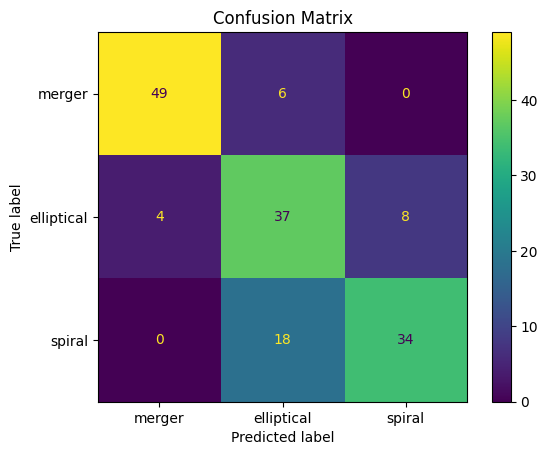

In [82]:
"""
We will use a confusion matrix to evaluate the quality of the classifier, by using the "actual_class" and "predicted_class" arrays.
Then, we visually represent this matrix by using the ConfusionMatrixDisplay() function, replacing the labels with the galaxy class.
"""

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Creates the confusion matrix.
cm = confusion_matrix(actual_class, predicted_class)

# Plots the confusion matrix, using the ConfusionMatrixDisplay() function.
cm_display = ConfusionMatrixDisplay(cm, display_labels = ["merger", "elliptical", "spiral"]).plot()
cm_display.ax_.set_title("Confusion Matrix")

# Shows the plot.
plt.show()

In [68]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(actual_class, predicted_class)

print("The test accuracy of the decision tree classifier:", accuracy*100, "%")

The test accuracy of the decision tree classifier: 77.56410256410257 %
